<div style="text-align: left; background-color:#5A96E3; font-family:Times New Roman; color:#191414; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 40px;border-style: solid;border-color:#5A96E3;"><strong>QUESTION</strong></div>

---

# Import thư viện

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# Dữ liệu

In [3]:
data_df = pd.read_csv('../Data/who_life_exp.csv')
data_df

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,LAO,Western Pacific,2012,64.49448,16.57977,209.2666,0.055840,0.004845,6.29833,...,2.07638,6444.530,47.5,65.267,0.3,4570.0,22.7,1.82147,NaN,NaN
3107,Lao People's Democratic Republic,LAO,Western Pacific,2013,64.79716,16.64219,205.1459,0.055350,0.004600,6.42186,...,2.39985,6541.304,45.6,65.717,0.3,4980.0,NaN,3.23381,NaN,NaN
3108,Lao People's Democratic Republic,LAO,Western Pacific,2014,65.10757,16.70787,200.8204,0.054585,0.004405,6.64447,...,2.29846,6639.756,43.7,66.144,0.3,5440.0,NaN,2.93781,NaN,NaN
3109,Lao People's Democratic Republic,LAO,Western Pacific,2015,65.45008,16.77074,196.6613,0.053465,0.004160,6.83826,...,2.45366,6741.164,42.0,66.546,0.3,5810.0,NaN,NaN,84.66104,NaN


# 3. Đặt câu hỏi có ý nghĩa

## Câu 1: Phân tích mối quan hệ giữa tuổi thọ trung bình khi sinh và tuổi thọ trung bình sau 60 tuổi. 

### Lợi ích từ việc trả lời câu hỏi:
- Trả lời câu hỏi này giúp ta hiểu rõ mối quan hệ giữa hai chỉ số tuổi thọ quan trọng này (tuổi thọ trung bình khi sinh và tuổi thọ trung bình sau 60 tuổi), từ đó đánh giá chất lượng cuộc sống qua các giai đoạn khác nhau.
- Xác định các yếu tố chính ảnh hưởng đến từng chỉ số tuổi thọ, từ đó có thể đề xuất các chính sách y tế hiệu quả hơn.
- Khám phá liệu có một nhóm quốc gia hoặc khu vực nào có xu hướng khác biệt trong mối quan hệ này không.

## Câu hỏi 2: Mỗi yếu tố số (numerical) tương quan thế nào với tuổi thọ trung bình khi sinh?

### Lợi ích từ việc trả lời câu hỏi:
- Xác định các yếu tố quan trọng ảnh hưởng đến tuổi thọ, giúp đưa ra các chiến lược cải thiện sức khỏe cộng đồng.
- Hiểu rõ mối liên kết giữa các yếu tố kinh tế (ví dụ: GNI), y tế (ví dụ: tử vong trẻ sơ sinh, tỷ lệ suy dinh dưỡng), giáo dục (ví dụ: tỷ lệ người lớn biết chữ) và tuổi thọ.
- Có thể dự đoán tuổi thọ nếu có các yếu tố tương quan và độ chính xác sẽ tăng nếu là các yếu tố tương quan mạnh.

## Câu hỏi 3: Số bác sĩ có ảnh hưởng như thế nào đến tuổi thọ trung bình ở các quốc gia?

### Lợi ích từ việc trả lời câu hỏi:
- Biết được mối quan hệ giữa số lượng bác sĩ và tuổi thọ trung bình ở các quốc gia.
- Cho thấy được tầm quan trọng của bác sĩ đối với sự tăng của tuổi thọ trung bình của quốc gia.

## Câu hỏi 4:
Sự thay đổi qua từng năm ở các yếu tố:
- Tỷ lệ tử vong ở người trưởng thành - adult_mortality.
- Lượng cồn nguyên chất tiêu thụ - alcohol.
- Chỉ số khối cơ thể trung bình - bmi.
- Tỷ lệ người 5 - 19 tuổi bị thiếu cân - age5-19thinness.
- Tỷ lệ người 5 - 19 tuổi bị béo phì - age5-19obesity.

của các khu vực trên thế giới là như thế nào? Tỷ lệ tử vong ở người trưởng thành có thể được giải thích bởi các yếu tố còn lại không?

### Lợi ích từ việc trả lời câu hỏi: 
Giúp nhóm phần nào nhìn kĩ hơn tình trạng sức khỏe của những người dân độ tuổi vị thành niên và độ tuổi lao dộng ở các quốc gia thuộc những khu vực khác nhau, cũng như tình trạng sử dụng đồ uống có cồn và có thể là những nguy cơ về thiếu/thừa cân.

# 4. Tiền xử lý và phân tích dữ liệu để trả lời các câu hỏi

## Câu 1: Phân tích mối quan hệ giữa tuổi thọ trung bình khi sinh và tuổi thọ trung bình sau 60 tuổi. 

### Trả lời:

Các bước để trả lời câu hỏi này bao gồm:
- Tiền xử lý: Kiểm tra số giá trị bị thiếu và điền các giá trị này.
- Phân tích dữ liệu để trả lời:
    - Vẽ biểu đồ histogram để kiểm tra phân bố của hai cột `life_expect` và `life_exp60`.
    - Phân tích tương quan giữa hai cột bằng hệ số tương quan Pearson.
    - Trực quan hóa mối quan hệ giữa hai chỉ số bằng biểu đồ scatter plot.
    - Vẽ đường hồi quy sau khi huấn luyện một mô hình hồi quy tuyến tính dự đoán tuổi thọ trung bình sau 60 tuổi dựa trên tuổi thọ trung bình khi sinh để kiểm chứng.

#### Tiền xử lý:

In [4]:
# Sao chép dữ liệu cho câu 1
df1 = data_df.copy()

Kiểm tra số giá trị thiếu của 2 cột `life_expect` và `life_exp60`. Vì 2 cột này không có giá trị bị thiếu, không cần xử lý các giá trị thiếu.

In [5]:
# 2 cột này đều không có dữ liệu thiếu
print('Số giá trị bị thiếu của `life_expect`: ', df1['life_expect'].isna().sum())
print('Số giá trị bị thiếu của `life_exp60`: ', df1['life_exp60'].isna().sum())

Số giá trị bị thiếu của `life_expect`:  0
Số giá trị bị thiếu của `life_exp60`:  0


#### Phân tích dữ liệu để trả lời:

- Đầu tiên, ta vẽ biểu đồ histogram cho 2 yếu tố này để kiểm tra phân bố của từng yếu tố:

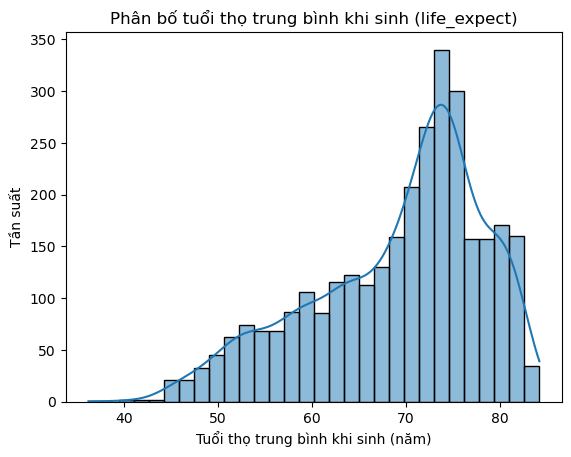

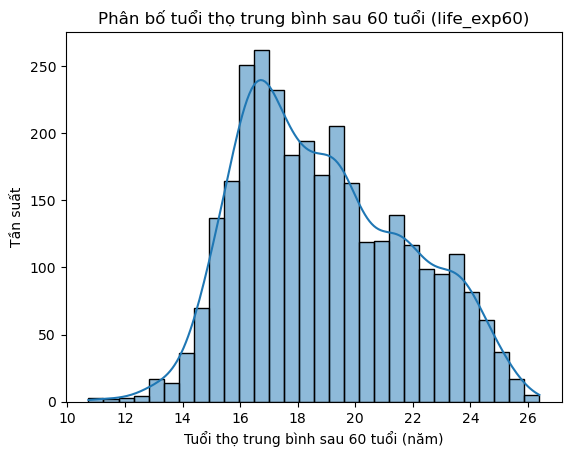

In [6]:
# Phân bố của life_expect
sns.histplot(df1['life_expect'], kde=True, bins=30)
plt.title('Phân bố tuổi thọ trung bình khi sinh (life_expect)')
plt.xlabel('Tuổi thọ trung bình khi sinh (năm)')
plt.ylabel('Tần suất')
plt.show()

# Phân bố của life_exp60
sns.histplot(df1['life_exp60'], kde=True, bins=30)
plt.title('Phân bố tuổi thọ trung bình sau 60 tuổi (life_exp60)')
plt.xlabel('Tuổi thọ trung bình sau 60 tuổi (năm)')
plt.ylabel('Tần suất')
plt.show()

Để có thêm thông tin, kiểm tra các giá trị trung bình và trung vị của 2 cột này:

In [7]:
mean_values = df1[['life_expect', 'life_exp60']].mean()
median_values = df1[['life_expect', 'life_exp60']].median()

print("Giá trị trung bình:")
print(mean_values)
print("\nGiá trị trung vị:")
print(median_values)

Giá trị trung bình:
life_expect    69.146384
life_exp60     18.912060
dtype: float64

Giá trị trung vị:
life_expect    71.59720
life_exp60     18.50826
dtype: float64


Tuổi thọ trung bình khi sinh có phân phối lệch phải, với mức trung bình là 69, trong khi tuổi thọ trung bình sau 60 tuổi có phân phối đối xứng hơn và hơi lệch trái, với mức trung bình là 19. Cả hai biến đều có giá trị trung bình gần với trung vị, cho thấy phân phối của chúng khá cân đối.

- Tiếp theo, ta vẽ biểu đồ scatter plot để thấy rõ hơn mối tương quan giữa 2 yếu tố này. 

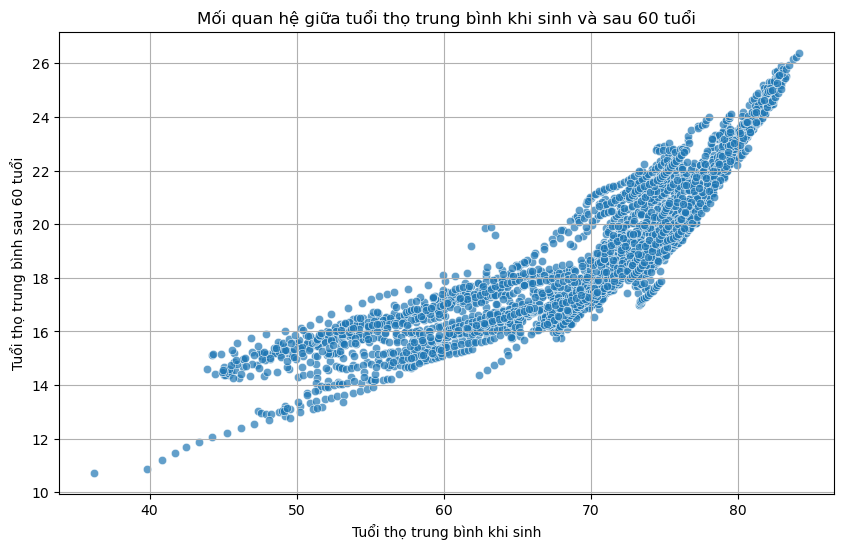

In [8]:
# Thiết lập biểu đồ
plt.figure(figsize=(10, 6))
sns.scatterplot(x='life_expect', y='life_exp60', data=df1, alpha=0.7)
plt.title("Mối quan hệ giữa tuổi thọ trung bình khi sinh và sau 60 tuổi")
plt.xlabel("Tuổi thọ trung bình khi sinh")
plt.ylabel("Tuổi thọ trung bình sau 60 tuổi")
plt.grid()
plt.show()

Có thể thấy mối tương quan mạnh mẽ giữa 2 yếu tố là một mối quan hệ đồng biến. Nghĩa là nếu tuổi thọ trung bình khi sinh tăng, tuổi thọ trung bình sau 60 tuổi cũng có xu hướng tăng. Kiểm tra hệ số tương quan giữa 2 biến này:

In [9]:
correlation = df1['life_expect'].corr(df1['life_exp60'])
print("Hệ số tương quan giữa life_expect và life_exp60:")
print(correlation)

Hệ số tương quan giữa life_expect và life_exp60:
0.8861588084071418


Hệ số tương quan là một thước đo thống kê về độ mạnh yếu của mối quan hệ giữa các chuyển động tương đối của hai biến, với giá trị nằm trong khoảng từ -1,0 đến 1,0. Đây là một hệ số tương quan dương tương đối cao và phản ánh đúng mối quan hệ đồng biến đã nhận xét ở trên.

- Để kiểm chứng mối quan hệ tuyến tính này, có thể huấn luyện một mô hình hồi quy tuyến tính dự đoán tuổi thọ trung bình sau 60 tuổi dựa trên tuổi thọ trung bình khi sinh, từ đó vẽ đường hồi quy tuyến tính. 

R-squared: 0.79


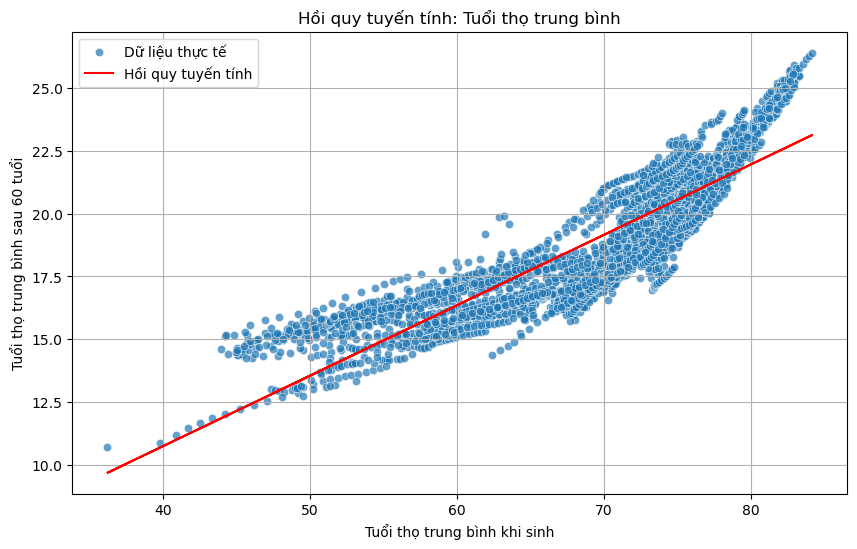

In [10]:
# Chuẩn bị dữ liệu
X = df1[['life_expect']].values
y = df1['life_exp60'].values

# Huấn luyện 
model = LinearRegression()
model.fit(X, y)

# Dự đoán 
y_pred = model.predict(X)

# Đánh giá mô hình
# r2 = r2_score(y, y_pred)
r2 = model.score(X, y)
print(f"R-squared: {r2:.2f}")

# Vẽ đường hồi quy
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['life_expect'], y=df1['life_exp60'], alpha=0.7, label="Dữ liệu thực tế")
plt.plot(df1['life_expect'], y_pred, color='red', label="Hồi quy tuyến tính")
plt.title("Hồi quy tuyến tính: Tuổi thọ trung bình")
plt.xlabel("Tuổi thọ trung bình khi sinh")
plt.ylabel("Tuổi thọ trung bình sau 60 tuổi")
plt.legend()
plt.grid()
plt.show()

Để kiểm tra độ tốt của mô hình, R² Score là một thước đo sự phù hợp của mô hình hồi quy tuyến tính.
- Công thức:
    $$
    R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
    $$
    - $\bar{y}$: Giá trị trung bình của $y_i$.
- Ý nghĩa: Giá trị R² gần 1 cho thấy mô hình dự đoán tốt, trong khi giá trị gần 0 cho thấy mô hình không giải thích được biến động của dữ liệu. 

### Nhận xét:
- Về mỗi yếu tố trong tuổi thọ trung bình khi sinh và tuổi thọ trung bình sau 60 tuổi:
    - Dựa trên 2 phân phối của mỗi yếu tố này, có thể thấy tuổi thọ khi sinh không được phân bố đồng đều giữa các quốc gia, tập trung nhiều nhất ở khoảng 70-75 năm và phần lớn người dân sống thêm khoảng 16–20 năm sau tuổi 60. Tuổi thọ sau 60 tuổi ít biến động hơn so với tuổi thọ khi sinh.

- Về mối tương quan giữa 2 yếu tố:
    - Tuổi thọ trung bình khi sinh và tuổi thọ trung bình sau 60 tuổi có mối quan hệ chặt chẽ, với tuổi thọ sau 60 tuổi có thể được coi là một phần của tuổi thọ khi sinh, chịu ảnh hưởng bởi các yếu tố tương tự như hệ thống y tế và mức sống.
    - Dựa trên biểu đồ scatter plot và hệ số tương quan, có thể thấy giữa 2 yếu tố này tồn tại mối quan hệ tuyến tính mạnh mẽ. Có xu hướng tăng đều giữa 2 biến, nghĩa là khi tuổi thọ trung bình khi sinh tăng thì tuổi thọ trung bình sau 60 tuổi cũng có xu hướng tăng.
    - Đường hồi quy tuyến tính khẳng định mối quan hệ tuyến tính mạnh giữa 2 biến, với giá trị R bình phương tương đối cao (0.79).  Khoảng 79% biến động của tuổi thọ trung bình sau 60 tuổi có thể được giải thích bởi tuổi thọ trung bình khi sinh. Tuy nhiên, vẫn có 21% biến động bị ảnh hưởng bởi các yếu tố khác (chẳng hạn hệ thống y tế, điều kiện xã hội, lối sống, hoặc các yếu tố đặc thù từng quốc gia).
    - Những sai lệch khỏi đường hồi quy gợi ý rằng cần phân tích thêm các yếu tố khác như bệnh tật, môi trường, và yếu tố văn hóa tại các khu vực cụ thể.
    - Một số quốc gia có tuổi thọ trung bình khi sinh thấp (khoảng 40-50 tuổi), nhưng tuổi thọ trung bình sau 60 tuổi vẫn tương đối cao (14-16 tuổi). Điều này có thể xảy ra ở các nước có điều kiện sống khó khăn trong giai đoạn đầu đời nhưng hệ thống chăm sóc người già tương đối tốt. Trong khi đó, một số quốc gia có tuổi thọ trung bình khi sinh cao (trên 75 tuổi), nhưng tuổi thọ sau 60 tuổi lại thấp hơn so với kỳ vọng.
    - Ở vùng có tuổi thọ trung bình khi sinh thấp (dưới 50 tuổi), dữ liệu phân tán rộng hơn. Điều này có thể phản ánh sự bất bình đẳng lớn hơn giữa các khu vực trong điều kiện chăm sóc sức khỏe hoặc mức độ tiếp cận với y tế.
    - Ở vùng tuổi thọ trung bình khi sinh cao (trên 70 tuổi), mối quan hệ gần như tuyến tính, nghĩa là khi tuổi thọ khi sinh tăng, tuổi thọ sau 60 tuổi cũng tăng đều. Trong khi đó, ở vùng tuổi thọ trung bình khi sinh thấp (dưới 50 tuổi), độ dốc ít rõ ràng hơn. Điều này có thể phản ánh việc ở các quốc gia phát triển (với tuổi thọ trung bình khi sinh cao), sự quan tâm đến sức khỏe và chất lượng sống của người cao tuổi thường được chú trọng hơn.
    - Nhìn chung, biểu đồ cho thấy một sự phân tách khá rõ giữa các quốc gia phát triển (tuổi thọ cao ở cả hai yếu tố) và các quốc gia đang phát triển hoặc kém phát triển (tuổi thọ thấp hơn, dữ liệu rải rác).
    - Kết quả này phù hợp với nhận định rằng các quốc gia có điều kiện sống tốt hơn (dẫn đến tuổi thọ trung bình khi sinh cao) thường có hệ thống chăm sóc y tế tốt hơn, giúp người cao tuổi sống lâu hơn.

## Câu hỏi 2: Mỗi yếu tố số (numerical) tương quan thế nào với tuổi thọ trung bình khi sinh?

### Trả lời: 
Các bước để trả lời câu hỏi này bao gồm:
- Tiền xử lý: Kiểm tra số giá trị bị thiếu và điền các giá trị này.
- Phân tích dữ liệu để trả lời:
    - Tính toán hệ số tương quan giữa `life_expect` với các cột khác và sử dụng heatmap để biểu diễn ma trận tương quan của toàn bộ các cột, từ đó chọn ra các yếu tố tương quan mạnh.
    - Trực quan hóa mối quan hệ của các cột có tương quan mạnh với biểu đồ scatter plot.
    - Mô hình hóa để kiểm chứng bằng cách xây dựng mô hình hồi quy đa biến để xác định các yếu tố ảnh hưởng lớn nhất đến `life_expect`. So sánh độ quan trọng của từng biến trong mô hình (feature importance).

#### Tiền xử lý:

Đầu tiên, ta thực hiện tiền xử lý dữ liệu. Dựa trên ý tưởng của <a href="https://www.kaggle.com/code/benbcoleman/global-health-data-analysis">Kaggle Notebook: Global Health Data Analysis</a>, để xử lý dữ liệu bị thiếu, trước hết, ta điền các giá trị bị thiếu bằng giá trị trung bình của cột tương ứng trong cùng quốc gia. Cách làm này hợp lý khi xem xét tuổi thọ dựa trên quốc gia hoặc vùng miền, vì các yếu tố trong cùng một khu vực thường có xu hướng tương đồng.

In [11]:
# Lấy các cột số
df2 = data_df.copy()
df2_numerical = df2.select_dtypes(include=np.number)

# Thay thế giá trị thiếu bằng giá trị trung bình theo từng quốc gia
df2 = df2.apply(lambda col: col.fillna(col.groupby(df2['country']).transform('mean')) if col.name in df2_numerical.columns else col)

# Kết quả: Số giá trị bị thiếu còn lại
print('Số giá trị bị thiếu còn lại của mỗi cột:')
print(df2.isnull().sum())  

Số giá trị bị thiếu còn lại của mỗi cột:
country              0
country_code         0
region               0
year                 0
life_expect          0
life_exp60           0
adult_mortality      0
infant_mort          0
age1-4mort           0
alcohol             17
bmi                 34
age5-19thinness     34
age5-19obesity      34
hepatitis          153
measles              0
polio                0
diphtheria           0
basic_water          0
doctors             17
hospitals          901
gni_capita          85
gghe-d              68
che_gdp             85
une_pop              0
une_infant           0
une_life             0
une_hiv            731
une_gni             85
une_poverty        578
une_edu_spend      238
une_literacy       544
une_school         646
dtype: int64


Cách làm này đã điền được hầu hết những giá trị bị thiếu. Những giá trị bị thiếu còn lại sẽ được thay thế bằng giá trị trung bình của cột đó.

In [12]:
# Tiếp tục thay thế giá trị thiếu còn lại bằng giá trị trung bình của mỗi cột
df2 = df2.apply(lambda col: col.fillna(col.mean()) if col.name in df2_numerical.columns else col)

# Kết quả: Không còn giá trị thiếu
print('Số giá trị bị thiếu còn lại của mỗi cột:')
print(df2.isnull().sum())  

Số giá trị bị thiếu còn lại của mỗi cột:
country            0
country_code       0
region             0
year               0
life_expect        0
life_exp60         0
adult_mortality    0
infant_mort        0
age1-4mort         0
alcohol            0
bmi                0
age5-19thinness    0
age5-19obesity     0
hepatitis          0
measles            0
polio              0
diphtheria         0
basic_water        0
doctors            0
hospitals          0
gni_capita         0
gghe-d             0
che_gdp            0
une_pop            0
une_infant         0
une_life           0
une_hiv            0
une_gni            0
une_poverty        0
une_edu_spend      0
une_literacy       0
une_school         0
dtype: int64


#### Phân tích dữ liệu để trả lời: 

- Tính toán hệ số tương quan giữa `life_expect` với các cột khác, biểu diễn bằng heatmap và chọn ra các yếu tố tương quan mạnh: Hệ số tương quan là một thước đo thống kê về độ mạnh yếu của mối quan hệ giữa các chuyển động tương đối của hai biến, với giá trị nằm trong khoảng từ -1,0 đến 1,0. Ta tính hệ số tương quan giữa các cột khác với tuổi thọ trung bình khi sinh và xem xét các yếu tố tương quan mạnh có độ tương quan `correlation` mà |`correlation`| ≥ 0.7.

In [13]:
df2_numerical = df2.select_dtypes(include=np.number)
correlation_matrix = df2_numerical.corr()
correlation_with_life_expect = correlation_matrix['life_expect'].sort_values(ascending=False)

print("Hệ số tương quan với life_expect:")
print(correlation_with_life_expect)

Hệ số tương quan với life_expect:
life_expect        1.000000
une_life           0.991448
life_exp60         0.886159
basic_water        0.833741
doctors            0.690722
polio              0.651369
diphtheria         0.645679
measles            0.644657
une_literacy       0.618014
age5-19obesity     0.615208
une_school         0.600359
gghe-d             0.595567
une_gni            0.595491
bmi                0.592418
gni_capita         0.564096
alcohol            0.402184
hepatitis          0.377285
che_gdp            0.271153
year               0.190961
une_edu_spend      0.175540
une_pop            0.029862
hospitals         -0.032774
une_hiv           -0.474277
age5-19thinness   -0.560122
une_poverty       -0.726080
age1-4mort        -0.864414
infant_mort       -0.930113
une_infant        -0.931899
adult_mortality   -0.946419
Name: life_expect, dtype: float64


Biểu diễn ma trận tương quan bằng heatmap:

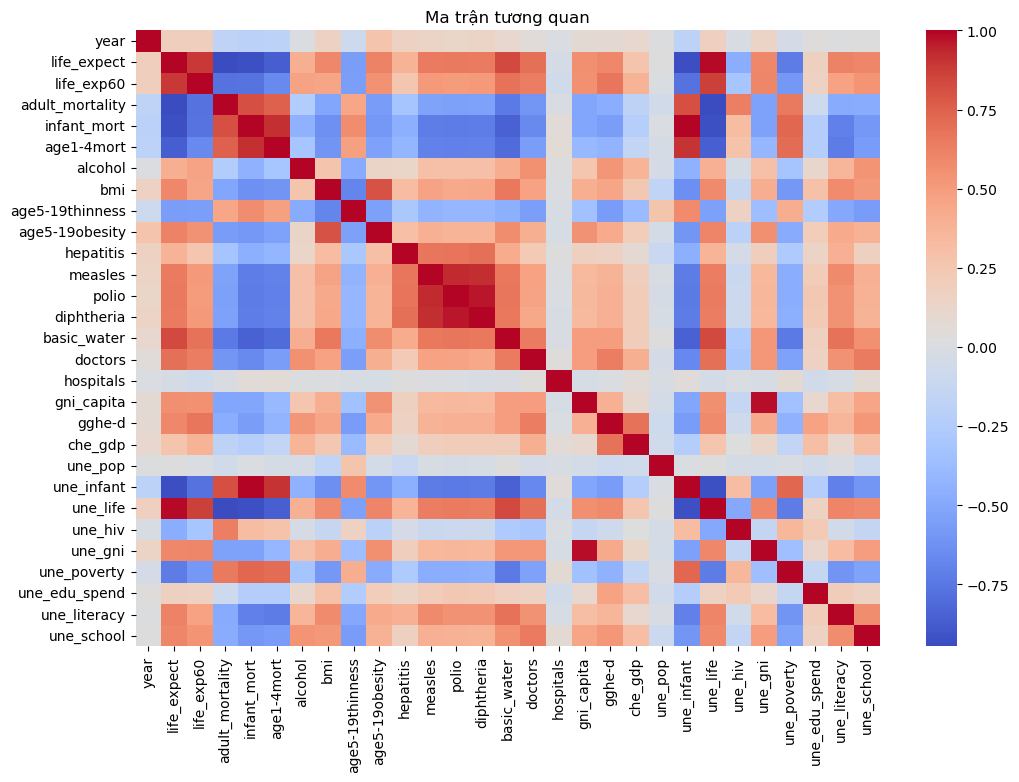

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Ma trận tương quan')
plt.show()

Dựa trên kết quả tính toán và biểu đồ minh họa, có thể thấy các yếu tố tương quan mạnh với tuổi thọ trung bình là: 
- Tương quan dương: Khi các yếu tố này tăng, tuổi thọ trung bình có xu hướng tăng.
    - `une_life`: 0.991448 
    - `life_exp60`: 0.886159
    - `basic_water`: 0.833741
- Tương quan âm: Khi các yếu tố này tăng, tuổi thọ trung bình có xu hướng giảm.
    - `une_poverty`: -0.726080 
    - `age1-4mort`: -0.864414 
    - `infant_mort`: -0.930113
    - `une_infant`: -0.931899 
    - `adult_mortality`: -0.946419

- Để thấy rõ hơn mối tương quan của từng yếu tố trên với tuổi thọ trung bình, ta có thể vẽ biểu đồ scatter plot của từng yếu tố với tuổi thọ trung bình:

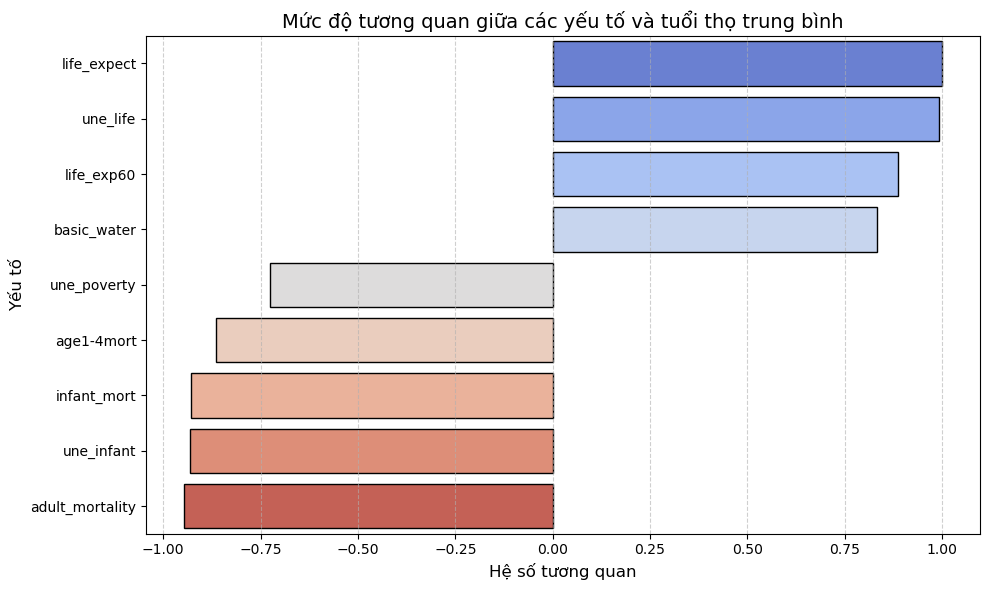

In [15]:
# Lọc các yếu tố tương quan mạnh có |corr| >= 0.7
threshold = 0.7
strong_correlation = correlation_with_life_expect[correlation_with_life_expect.abs() >= threshold]

# Dũ liệu để vẽ biểu đồ
correlation_data = {
    'Features': strong_correlation.index,
    'Correlation': strong_correlation.values
}

correlation_df = pd.DataFrame(correlation_data)
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Vẽ
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Features', data=correlation_df, palette='coolwarm', edgecolor='black')
plt.title('Mức độ tương quan giữa các yếu tố và tuổi thọ trung bình', fontsize=14)
plt.xlabel('Hệ số tương quan', fontsize=12)
plt.ylabel('Yếu tố', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

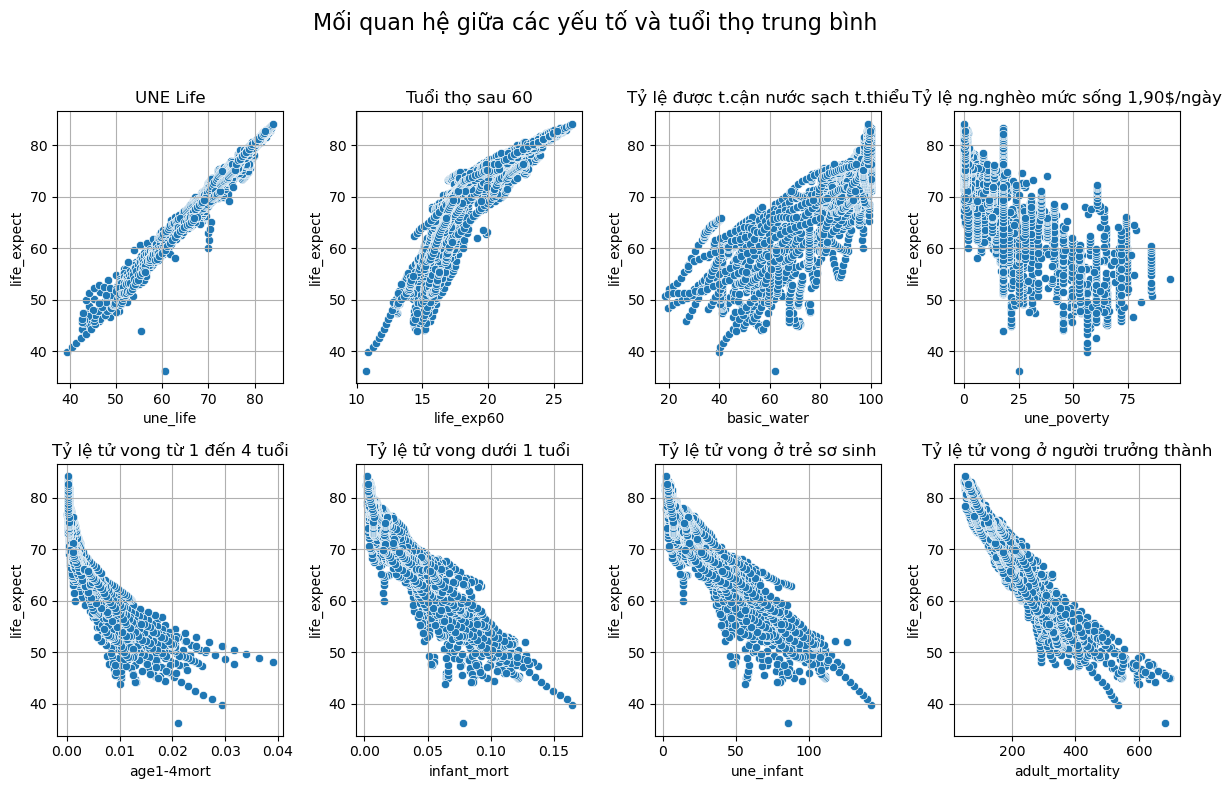

In [16]:
# Danh sách các cặp biến để vẽ biểu đồ
scatter_plots = [
    {'x': 'une_life', 'y': 'life_expect', 'title': 'UNE Life', 'xlabel': 'UNE Life', 'ylabel': 'Tuổi thọ trung bình (năm)'},
    {'x': 'life_exp60', 'y': 'life_expect', 'title': 'Tuổi thọ sau 60', 'xlabel': 'Tuổi thọ sau 60 (năm)', 'ylabel': 'Tuổi thọ trung bình (năm)'},
    {'x': 'basic_water', 'y': 'life_expect', 'title': 'Tỷ lệ được t.cận nước sạch t.thiểu', 'xlabel': 'Tỷ lệ tiếp cận nước sạch (%)', 'ylabel': 'Tuổi thọ trung bình (năm)'},
    {'x': 'une_poverty', 'y': 'life_expect', 'title': 'Tỷ lệ ng.nghèo mức sống 1,90$/ngày', 'xlabel': 'Tỷ lệ số người nghèo có mức sống 1,90 đô la một ngày (PPP)', 'ylabel': 'Tuổi thọ trung bình (năm)'},
    {'x': 'age1-4mort', 'y': 'life_expect', 'title': 'Tỷ lệ tử vong từ 1 đến 4 tuổi', 'xlabel': 'Tỷ lệ tử vong trẻ 1-4 tuổi (%)', 'ylabel': 'Tuổi thọ trung bình (năm)'},
    {'x': 'infant_mort', 'y': 'life_expect', 'title': 'Tỷ lệ tử vong dưới 1 tuổi', 'xlabel': 'Tỷ lệ tử vong dưới 1 tuổi (%)', 'ylabel': 'Tuổi thọ trung bình (năm)'},
    {'x': 'une_infant', 'y': 'life_expect', 'title': 'Tỷ lệ tử vong ở trẻ sơ sinh', 'xlabel': 'Tỷ lệ tử vong, trẻ sơ sinh (%)', 'ylabel': 'Tuổi thọ trung bình (năm)'},
    {'x': 'adult_mortality', 'y': 'life_expect', 'title': 'Tỷ lệ tử vong ở người trưởng thành', 'xlabel': 'Tỷ lệ tử vong người lớn (%)', 'ylabel': 'Tuổi thọ trung bình (năm)'}
]

# Vẽ scatter plot
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
fig.suptitle('Mối quan hệ giữa các yếu tố và tuổi thọ trung bình', fontsize=16)

for ax, plot in zip(axes.flat, scatter_plots):
    sns.scatterplot(ax=ax, x=plot['x'], y=plot['y'], data=df2)
    ax.set_title(plot['title'], fontsize=12)
    ax.set_xlabel(plot['x'], fontsize=10)
    ax.set_ylabel(plot['y'], fontsize=10)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Xây dựng mô hình hồi quy đa biến từ các yếu tố tương quan mạnh: Để đánh giá mô hình, kiểm tra các giá trị *Mean Squared Error (MSE)* và *R² score* của mô hình. Trong đó:
    - Mean Squared Error (MSE):
        - Là trung bình bình phương của sai số giữa giá trị thực tế và giá trị dự đoán.
        - Công thức:  
                $$
                MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
                $$
    
            - $n$: Số lượng điểm dữ liệu.  
            - $y_i$: Giá trị thực tế của điểm dữ liệu thứ $i$.  
            - $\hat{y}_i$: Giá trị dự đoán của điểm dữ liệu thứ $i$.  
        - MSE càng nhỏ, mô hình dự đoán càng chính xác.
    - R² Score:
        - Là một thước đo sự phù hợp của mô hình hồi quy tuyến tính.
        - Công thức:
            $$
            R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
            $$
            - $\bar{y}$: Giá trị trung bình của $y_i$.
        - Ý nghĩa: Giá trị R² gần 1 cho thấy mô hình dự đoán tốt, trong khi giá trị gần 0 cho thấy mô hình không giải thích được biến động của dữ liệu.

In [17]:
# Chuẩn bị dữ liệu
features = ['une_life', 'life_exp60', 'basic_water', 'une_poverty', 'age1-4mort', 'infant_mort', 'une_infant', 'adult_mortality']
X = df2[features]
y = df2['life_expect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 score: {model.score(X_test, y_test):.4f}")

Mean Squared Error (MSE): 0.2567
R^2 score: 0.9971


Mô hình được xây dựng từ các yếu tố tương quanh mạnh được lựa chọn có giá trị MSE thấp và R bình phương gần 1, cho thấy mô hình hoạt động hiệu quả. Ta có thể kiểm tra độ quan trọng của các biến dựa trên hệ số hồi quy (β) của từng biến:

In [18]:
importance = model.coef_
for i, v in enumerate(importance):
    print(f"Độ quan trọng của biến {features[i]}: {v:.4f}")

Độ quan trọng của biến une_life: 0.1259
Độ quan trọng của biến life_exp60: 0.7490
Độ quan trọng của biến basic_water: 0.0141
Độ quan trọng của biến une_poverty: -0.0026
Độ quan trọng của biến age1-4mort: -196.6772
Độ quan trọng của biến infant_mort: -24.0521
Độ quan trọng của biến une_infant: -0.0372
Độ quan trọng của biến adult_mortality: -0.0299


### Nhận xét:
1. **Dữ liệu thiếu**: 
   - Có một số cột có tỷ lệ dữ liệu thiếu khá cao. Phương pháp điền dữ liệu thiếu có thể ảnh hưởng đến các phân tích sau này. Do đó, yêu cầu sử dụng phương pháp chính xác hơn để đảm bảo kết quả phân tích đáng tin cậy hơn, đặc biệt khi dữ liệu thiếu có thể ảnh hưởng đến sự chính xác của các yếu tố tương quan.

2. **Các yếu tố tương quan mạnh với `life_expect`**:
   - **Tương quan dương**:
     - `une_life` có độ tương quan rất cao với `life_expect` (0.99). Điều này dễ hiểu vì cả hai đều đo lường tuổi thọ, chỉ khác nguồn thu thập dữ liệu.
     - `life_exp60` cũng có sự tương quan cao (0.88) với `life_expect`, cho thấy mối quan hệ chặt chẽ giữa tuổi thọ trung bình và tuổi thọ sau 60 tuổi. Mối quan hệ này đã được tìm hiểu ở câu hỏi 1.
     - `basic_water` (tỷ lệ dân số được tiếp cận với nước sạch tối thiểu) có tương quan mạnh với tuổi thọ trung bình, phản ánh sự quan trọng của việc tiếp cận nước sạch đối với sức khỏe và tuổi thọ, vì nhu cầu về nước là một nhu cầu quan trọng trong cuộc sống con người.
   
   - **Tương quan âm**:
     - Các yếu tố có tương quan âm với `life_expect` bao gồm:
       - `une_poverty` (tỷ lệ người nghèo): Tỷ lệ nghèo đói có tác động tiêu cực đến tuổi thọ trung bình, lý giải rằng những vùng có tỷ lệ nghèo cao thường đi kèm với các vấn đề sức khỏe và điều kiện sống kém.
       - `age1-4mort`, `infant_mort`, `une_infant`, và `adult_mortality` (các tỷ lệ tử vong): Các tỷ lệ tử vong ở trẻ em và người trưởng thành có ảnh hưởng tiêu cực đến tuổi thọ trung bình, điều này phản ánh sự thiếu hụt trong chăm sóc y tế và điều kiện sống không tốt, dẫn đến tỷ lệ tử vong cao, làm giảm tuổi thọ trung bình.

   - Mối quan hệ giữa các yếu tố như tỷ lệ tử vong và tỷ lệ tiếp cận nước sạch được thể hiện rõ rệt qua các biểu đồ scatter plot. Những yếu tố này cho thấy mức độ ảnh hưởng lớn đến tuổi thọ trung bình khi sinh.

3. **Mô hình hồi quy tuyến tính**:
   - Khi kiểm tra hệ số của từng biến trong mô hình hồi quy tuyến tính, kết quả cho thấy rằng các yếu tố như tỷ lệ tử vong ở người trưởng thành và tỷ lệ tử vong dưới 1 tuổi là những yếu tố ảnh hưởng nhiều nhất đến mô hình khi dự đoán `life_expect`.
   - Các yếu tố khác như tỷ lệ tiếp cận nước sạch và nghèo đói có ảnh hưởng nhất định, nhưng không mạnh mẽ như các yếu tố về tỷ lệ tử vong.
   
   Điều này cho thấy rằng nếu muốn dự đoán tuổi thọ trung bình dựa trên các yếu tố khác, nên tập trung vào các yếu tố như tỷ lệ tử vong ở người lớn và dưới 1 tuổi. Những yếu tố này có thể phản ánh chính xác hơn sự thay đổi trong tuổi thọ trung bình, và là các yếu tố quan trọng trong mô hình hồi quy.

## Câu hỏi 3: Số bác sĩ có ảnh hưởng như thế nào đến tuổi thọ trung bình ở các quốc gia?

### Trả lời:

Các bước để trả lời câu hỏi này bao gồm:
- Tiền xử lý: Tạo dataframe mới chứa các cột dữ liệu cần xử lí gồm `doctors` và `life_expect`. Loại bỏ các giá trị NaN.
- Phân tích dữ liệu để trả lời:
    - Vẽ biểu đồ pairplot để thể hiện mức độ tương quan giữa cặp dữ liệu.
    - Vẽ biểu đồ đường biểu diễn xu hướng tuổi thọ trung bình và số lượng bác sĩ theo châu lục qua các năm.

#### Tiền xử lý:

In [19]:
# Tạo DataFrame mới và loại bỏ những giá trị Nan
df_health = data_df[['doctors', 'life_expect']].dropna()

#### Phân tích dữ liệu để trả lời:

- Biểu đồ phân tán của cặp dữ liệu:

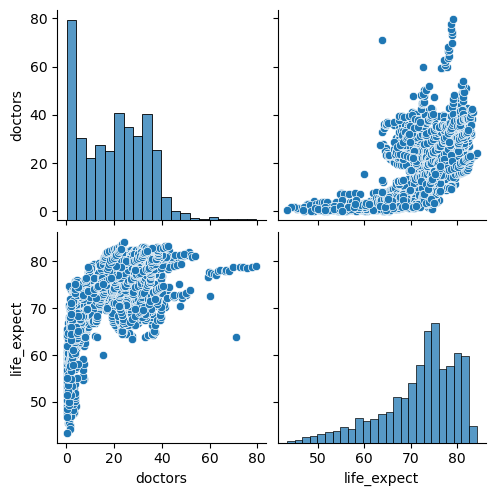

In [20]:
# Vẽ biểu đồ phân tán
sns.pairplot(df_health)
plt.show()

Từ biểu đồ trên ta có thể thấy số lượng bác sĩ có ảnh hưởng đến tuổi thọ trung bình vì số lượng bác sĩ càng lớn cho thấy sự quan tâm đến y tế của quốc gia càng lớn. Tuy nhiên, từ biểu đồ ta chưa thể xác định rõ được liệu số lượng các sĩ có ảnh hưởng mật thiết đến tuổi thọ trung bình hay không. 

- Ta sẽ vẽ biểu đồ đường biểu diễn tuổi thọ trung bình và số lượng bác sĩ theo châu lục qua các năm để xem xét sự thay đổi của số lượng bác sĩ và tuổi thọ trung bình ở các châu lục qua từng năm.

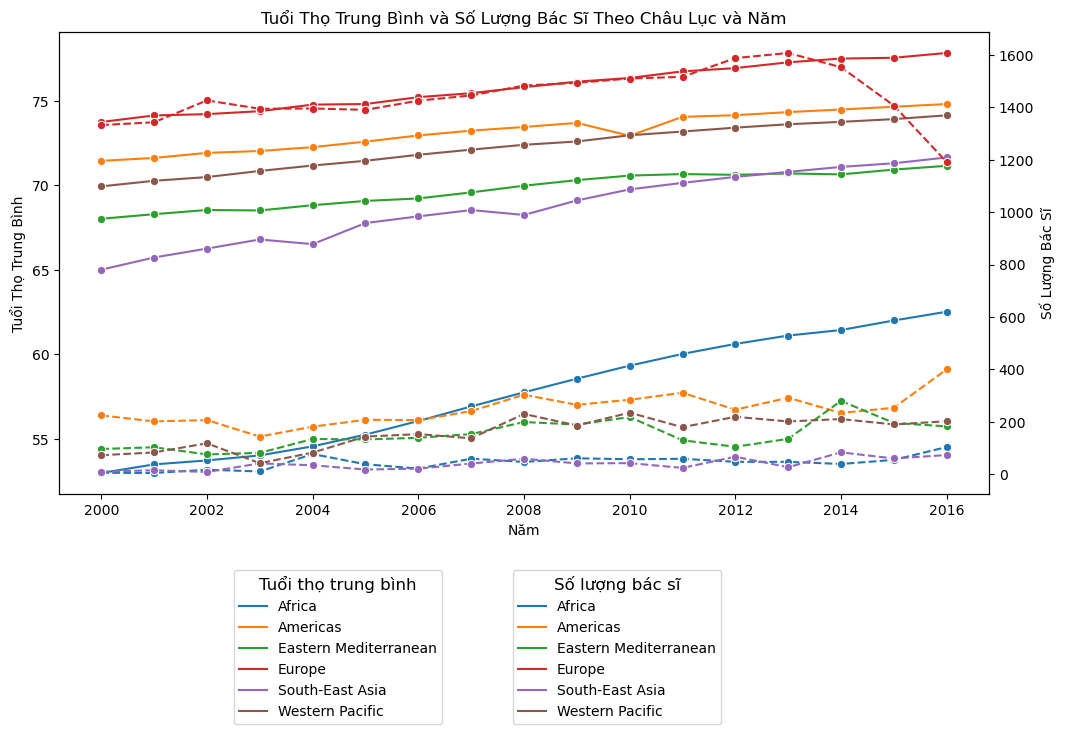

In [21]:
# Groupby theo châu lục và năm, tính trung bình tuổi thọ và số lượng bác sĩ
grouped_df = data_df.groupby(['region', 'year']).agg({'life_expect': 'mean', 'doctors': 'sum'}).reset_index()

# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='life_expect', hue='region', data=grouped_df, marker='o')
plt.title('Tuổi Thọ Trung Bình và Số Lượng Bác Sĩ Theo Châu Lục và Năm')
plt.xlabel('Năm')
plt.ylabel('Tuổi Thọ Trung Bình')
plt.legend(title='Tuổi thọ trung bình', fontsize=10, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.3, -0.15))

# Sử dụng trục phụ để vẽ số lượng bác sĩ
ax2 = plt.gca().twinx()
sns.lineplot(x='year', y='doctors', hue='region', data=grouped_df, marker='o', linestyle='--', ax=ax2)
ax2.set_ylabel('Số Lượng Bác Sĩ')
ax2.legend(title='Số lượng bác sĩ', fontsize=10, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.6, -0.15))

plt.show()

Dựa vào đồ thị trên ta có thể thấy được:
- Có một khoảng thời gian số lượng bác sĩ và tuổi thọ trung bình có sự thay đổi không giống nhau (Châu Âu từ 2013-2016, tuổi thọ tăng trong khi lượng bác sĩ giảm), nhưng nhìn chung thì số lượng bác sĩ tăng có dẫn tới sự tăng của tuổi thọ trung bình theo thời gian.
- Biểu đồ trên cho thấy, số lượng bác sĩ có ảnh hưởng tới độ tăng của tuổi thọ trung bình, tuy nhiên độ tăng ở tuổi thọ trung bình nhanh hơn số lượng bác sĩ. Vì thế, sự gia tăng tuổi thọ trung bình còn phụ thuộc vào nhiều yếu tố khác.

## Câu hỏi 4:
Sự thay đổi qua từng năm ở các yếu tố:
- Tỷ lệ tử vong ở người trưởng thành - adult_mortality.
- Lượng cồn nguyên chất tiêu thụ - alcohol.
- Chỉ số khối cơ thể trung bình - bmi.
- Tỷ lệ người 5 - 19 tuổi bị thiếu cân - age5-19thinness.
- Tỷ lệ người 5 - 19 tuổi bị béo phì - age5-19obesity.

của các khu vực trên thế giới là như thế nào? Tỷ lệ tử vong ở người trưởng thành có thể được giải thích bởi các yếu tố còn lại không?

### Trả lời:

Các bước để trả lời câu hỏi này bao gồm:
- Phân tích dữ liệu để trả lời:
    - Truy xuất các cột đã liệt kê và cột "region", "year" để gom nhóm dữ liệu và biểu diễn theo từng năm.
    - Tính sự thay đổi qua từng năm của các yếu tố trên.
    - Trực quan sự thay đổi cho `adult_mortality` qua các năm cho từng khu vực.
    - Tìm mô hình giải thích tỷ lệ tử vong ở người trưởng thành bởi những yếu tố khác, nếu có.

#### Phân tích dữ liệu để trả lời:

- Truy xuất các cột đã liệt kê và cột "region", "year" để gom nhóm dữ liệu và biểu diễn theo từng năm:

In [22]:
mature_pop_attr_df = data_df.iloc[:, [0, 1, 2, 3, 6, 9, 10, 11, 12]]
mature_pop_attr_df

,country,country_code,region,year,adult_mortality,alcohol,bmi,age5-19thinness,age5-19obesity
0,Angola,AGO,Africa,2000,383.5583,1.47439,21.7,11.0,0.5
1,Angola,AGO,Africa,2001,372.3876,1.94025,21.8,10.9,0.5
2,Angola,AGO,Africa,2002,354.5147,2.07512,21.9,10.7,0.6
3,Angola,AGO,Africa,2003,343.2169,2.20275,22.0,10.5,0.7
4,Angola,AGO,Africa,2004,333.8711,2.41274,22.2,10.3,0.8
...,...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,LAO,Western Pacific,2012,209.2666,6.29833,22.4,9.2,3.1
3107,Lao People's Democratic Republic,LAO,Western Pacific,2013,205.1459,6.42186,22.6,9.1,3.5
3108,Lao People's Democratic Republic,LAO,Western Pacific,2014,200.8204,6.64447,22.7,9.0,3.8
3109,Lao People's Democratic Republic,LAO,Western Pacific,2015,196.6613,6.83826,22.8,8.9,4.2


- Tính sự thay đổi qua từng năm của các yếu tố trên:
    - Lấy ra các cột tỷ lệ từ DataFrame truy xuất ở bước 1.
    - Gom nhóm dữ liệu theo cột "region" và "year" và tính trung bình.
    - Tiếp tục gom nhóm theo cột "country_code" và tính chênh lệch các số liệu của năm sau so với năm trước tại các nhóm.
    - Thêm lại các cột thông tin quốc gia và năm dữ liệu.
    - Xóa các dòng ở năm 2000.

In [23]:
mature_pop_attr_diff = mature_pop_attr_df.iloc[:, [1, 4, 5, 6, 7, 8]]
mature_pop_attr_diff = mature_pop_attr_diff.groupby('country_code').diff()
mature_pop_attr_diff = mature_pop_attr_diff.join(mature_pop_attr_df.iloc[:, :4])
mature_pop_attr_diff.drop(index=mature_pop_attr_diff[mature_pop_attr_diff.year == 2000].index
                          , inplace=True)
mature_pop_attr_diff

,adult_mortality,alcohol,bmi,age5-19thinness,age5-19obesity,country,country_code,region,year
1,-11.1707,0.46586,0.1,-0.1,0.0,Angola,AGO,Africa,2001
2,-17.8729,0.13487,0.1,-0.2,0.1,Angola,AGO,Africa,2002
3,-11.2978,0.12763,0.1,-0.2,0.1,Angola,AGO,Africa,2003
4,-9.3458,0.20999,0.2,-0.2,0.1,Angola,AGO,Africa,2004
5,-11.1634,1.07366,0.1,-0.1,0.0,Angola,AGO,Africa,2005
...,...,...,...,...,...,...,...,...,...
3106,-4.6248,0.03829,0.1,-0.2,0.3,Lao People's Democratic Republic,LAO,Western Pacific,2012
3107,-4.1207,0.12353,0.2,-0.1,0.4,Lao People's Democratic Republic,LAO,Western Pacific,2013
3108,-4.3255,0.22261,0.1,-0.1,0.3,Lao People's Democratic Republic,LAO,Western Pacific,2014
3109,-4.1591,0.19379,0.1,-0.1,0.4,Lao People's Democratic Republic,LAO,Western Pacific,2015


Thống kê mô tả cho DataFrame chứa thông tin về sự thay đổi qua từng năm của các yếu tố trên:

In [24]:
mature_pop_attr_diff.describe()

,adult_mortality,alcohol,bmi,age5-19thinness,age5-19obesity,year
count,2928.000000,2879.000000,2896.000000,2896.000000,2896.000000,2928.00000
mean,-3.566965,0.001190,0.076519,-0.076174,0.259530,2008.50000
std,15.208105,0.505493,0.052513,0.115584,0.179769,4.61056
min,-426.386800,-3.867210,-0.100000,-1.000000,-0.100000,2001.00000
25%,-4.975050,-0.109165,0.000000,-0.100000,0.100000,2004.75000
50%,-2.357850,0.001360,0.100000,0.000000,0.200000,2008.50000
75%,-0.814250,0.116755,0.100000,0.000000,0.400000,2012.25000
max,425.731800,5.926960,0.300000,0.200000,1.100000,2016.00000


**Nhận xét:**
- Chỉ số khối cơ thể trung bình cũng như là các tỷ lệ về người trẻ bị thiếu/thừa cân không có sự tăng/giảm quá lớn nào ở các quốc gia trong giai đoạn 2000 - 2016, cho thấy những vấn đề trên không có sự mất kiểm soát.
- Lượng đồ uống có cồn tiêu thụ trên đầu người có sự thay đổi lớn hơn cho thấy có quốc gia đã áp dụng các biện pháp siết chặt quản lý làm cho lượng tiêu thụ giảm mạnh, ngược lại cũng có nơi việc quản lý buông lỏng, phần nào khuyến khích người dân sử dụng rượu bia.
- Tỷ lệ tử vong ở người trưởng thành cũng có những biến động lớn, đặc biệt với mức tăng khá cao khoảng 420/1000 người, cho thấy có thể đã xảy ra sự việc nghiêm trọng, hay đơn giản là thay đổi trong việc tổng hợp và báo cáo số liệu. Tương tự cho mức giảm sâu ở tỷ lệ tử vong.

- Trực quan hóa sự thay đổi của `adult_mortality` qua các năm cho từng khu vực bằng biểu đồ cột:

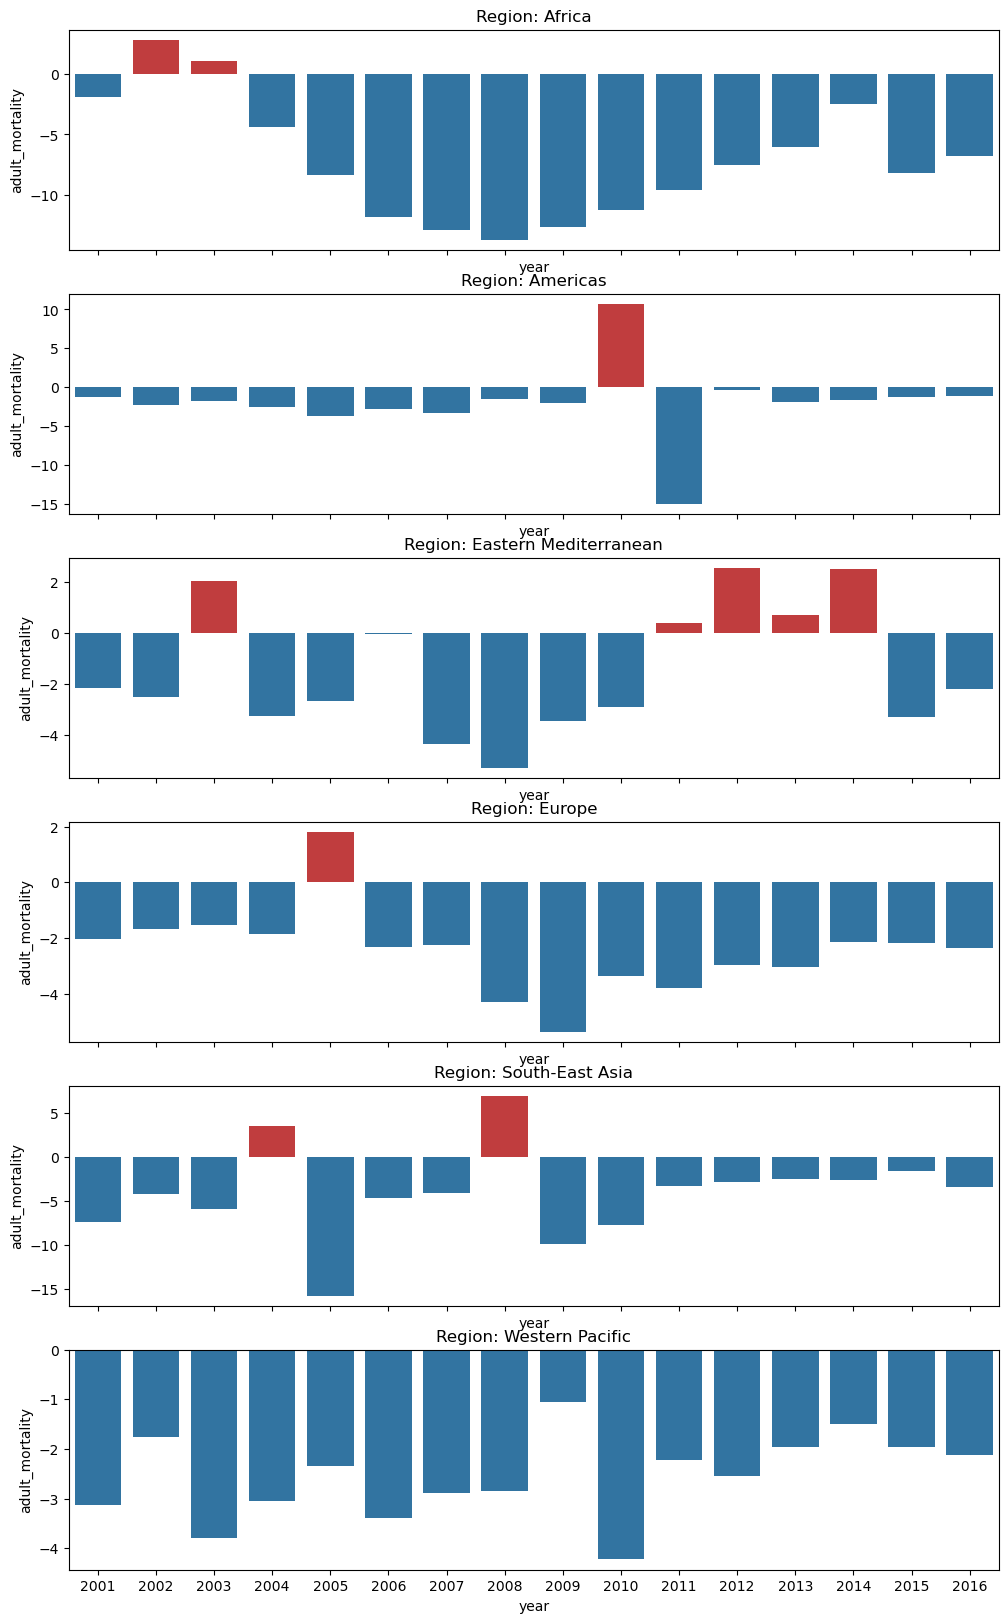

In [27]:
regions = mature_pop_attr_diff.region.unique()
fig, axes = plt.subplots(regions.size, figsize=(12, 20), sharex=True)
for i, region in enumerate(regions):
    df = mature_pop_attr_diff[mature_pop_attr_diff.region == region]
    df = df.groupby('year').mean(numeric_only=True).reset_index()

    custom_palette = np.where(df.adult_mortality > 0, 'tab:red', 'tab:blue')
    sns.barplot(x='year', y='adult_mortality', data=df,
               palette=custom_palette, ax=axes[i])
    
    axes[i].set_title(f'Region: {region}')
    
fig.show()

**Nhận xét:**
- Khu vực Tây Thái Bình Dương không ghi nhận trường hợp tăng tỷ lệ tử vong nào trong giai đoạn 2000 - 2016, phần nào cho thấy sự cải thiện về sức khỏe của người dân ở độ tuổi trưởng thành.
- Khu vực Đông Địa Trung Hải có 4 năm liên tiếp tăng tỷ lệ tử vong ở người trưởng thành với mức 1 - 4 người/1000 người.
- Khu vực châu Phi đã duy trì đà giảm tỷ lệ tử vong ở người lớn khá tốt với 8 năm liên tục từ 2005 - 2013 có mức giảm trên 5/1000 người.
- Châu Mỹ có mức giảm khá ổn định, ngoại trừ 1 lần tăng mạnh vào năm 2010 trước khi giảm sâu vào năm tiếp theo. Mức tăng trung bình 10/1000 người cũng là mức tăng trung bình lớn nhất. Ngoài ra đây cùng với Đông Nam Á là hai khu vực có thời điểm đạt mức giảm ~15/1000 người, mức lớn nhất được ghi nhận trong tập dữ liệu này.